In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [6]:
# to check whether the data has loaded perfectly
data.head

<bound method NDFrame.head of            Date  Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
0    2018-10-08              208.00              222.25              206.85   
1    2018-10-05              217.00              218.60              205.90   
2    2018-10-04              223.50              227.80              216.15   
3    2018-10-03              230.00              237.50              225.75   
4    2018-10-01              234.55              234.60              221.05   
..          ...                 ...                 ...                 ...   
200  2017-12-14              288.00              288.25              279.20   
201  2017-12-13              290.00              292.50              282.20   
202  2017-12-12              298.60              298.60              286.65   
203  2017-12-11              290.00              299.55              285.90   
204  2017-12-08              287.55              289.90              285.05   

     Add4(in Thousand

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

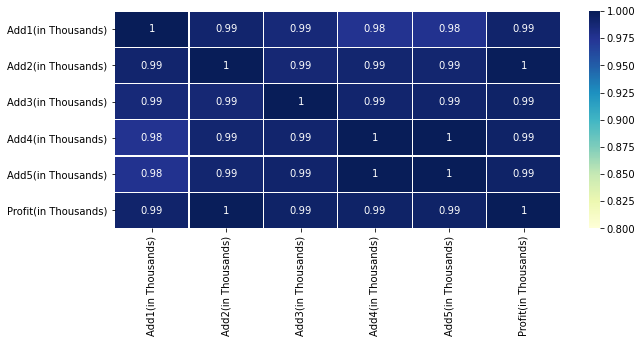

In [7]:
# to find the correlation between the variables
# we are using corr function to take the correlation and we are storing it to corrmatrix
# then we are plotting the matrix and have specified the size of the matrix
# now using the heatmap function we are plotting the correlation matrix
# vmin and vmax represents the minimum and maximum correlation values
# annot=True is used to give annotations inside each correlation to specify the value inside each correlation cell
# linewidth is used to adjust the lines between each cell 
# cmap is used to specify the colour of the correlation heatmap
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.8,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

In [8]:
# there is a high positive correlation between the amount spent for advertising through five different companies and profit generated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [9]:
# Now we can split the total dataset into dependent and independent variable. Only then we will be able to do the regression.
# the dependent variable is stored to y and independent variables are stored to x.

In [8]:
# to display the column
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [9]:
# we need to predict the profit.
# so we take it as y.
# for x, we need to drop the output from x and 'date'
# and we need to specify the axis
y=data[ 'Profit(in Thousands)']
x=data.drop(['Date', 'Profit(in Thousands)'],axis=1)

In [10]:
# now we have splitted the data into x and y
# next we are going to split the dataset into train & test set
# splitting into training & testinng set is available in the Sklearn library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [11]:
# now we are going to make a linear-regression model
from sklearn import linear_model

In [12]:
# we are creating an instance of the linear-regraession model and it is stored to the variable lr
lr=linear_model.LinearRegression()

In [13]:
# next we are fitting the instance created to our training data and creating the linear regression model
# and we will store it to another variable.
model=lr.fit(x_train,y_train)

In [14]:
# now we will predict the output for x_test 
predictions=model.predict(x_test)

In [19]:
# now for the values in x_train it will predict and it will store to predictions.
# now we have got the predicted values in predictions.
# the values in x_test originally have an output and that is already present in y_test variable
# now we will check both

In [15]:
# first we will print y_test
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [16]:
# now we will check what is the predicted values
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [17]:
# we have to use some metrics to calculate the accuracy of our model
# we will use the mean squared error technique to calculate the efficiency of our model 
# fro that we will import mean_squared_error from the metrics class of sklearn library and we will print it
from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predictions))

MSE is : 2.242932045576479e-24


In [23]:
# here we got a mean squared error of 1.5589173082730137e-24,
# which implies that there is a strong relationship between profit and the other variables.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.  [ Add1(in Thousands):290 , Add2(in Thousands):312 , Add3(in Thousands):309 , Add4(in Thousands):298 , Add5(in Thousands):320 ]

In [19]:
given_values=[[290,312,309,298,320]]
new_profit=model.predict(given_values)
new_profit

array([5820.06])

In [20]:
# If the company wish to spend the given amount for advertisement, then the profit generated by the company will be 5820.06(in Thousands)